<a href="https://colab.research.google.com/github/DimOriCoding/Artificial_Intelligence_II/blob/main/Artificial_Intelligence_II_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('imdb-reviews.csv', sep = '\t')
print(data)
data.describe()
row_count_train = sum(1 for rows in data["url"])


                                                    url  rating  \
0      http://www.imdb.com/title/tt0120623/usercomments    10.0   
1      http://www.imdb.com/title/tt0043117/usercomments     9.0   
2      http://www.imdb.com/title/tt0043117/usercomments    10.0   
3      http://www.imdb.com/title/tt0835204/usercomments     4.0   
4      http://www.imdb.com/title/tt0499603/usercomments    10.0   
...                                                 ...     ...   
45003  http://www.imdb.com/title/tt0449000/usercomments     1.0   
45004  http://www.imdb.com/title/tt0109382/usercomments     1.0   
45005  http://www.imdb.com/title/tt0375560/usercomments     1.0   
45006  http://www.imdb.com/title/tt0165107/usercomments     1.0   
45007  http://www.imdb.com/title/tt0041513/usercomments    10.0   

                                                  review  
0      I thought this was a quiet good movie. It was ...  
1      Wagon Master is a very unique film amongst Joh...  
2      This film h

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2023-11-01 18:28:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-01 18:28:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-01 18:28:44--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import random
import os
import torchvision.transforms as transforms
import numpy as np
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cpu


In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
def basic_preprocessing(text):
  # Remove tags
  text = re.sub(r'@\s?\w+',' ',str(text))
  # Remove underscore characters
  text = re.sub(r'_', ' ', text)
  # remove numbers
  text = re.sub(r'\d+', '', text)
  # Remove \r and \n
  text = re.sub(r'[\r\n]',' ', text)
  # remove whitespace from text
  text =  " ".join(text.split())
  # Remove single characters
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text)
  # Remove single characters from start
  text = re.sub(r'^[a-zA-Z]\s+', '', text)
  # Remove single characters from end
  text = re.sub(r'\s+[a-zA-Z]$', '', text)
  # Remove punctuation
  translator = str.maketrans('', '', string.punctuation)
  text =  text.translate(translator)
  # Removing prefixed 'b'
  text = re.sub(r'^b\s+', '', text)
    # Convert multiple spaces to single space and remove beginning and end spaces
  text = re.sub(r' +',' ',text).strip()
    # Convert to lowercase
  text = text.casefold()
  return text
#defining the function to remove stopwords from text
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = text.split(' ')
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text


data['review']= data['review'].apply(lambda x:basic_preprocessing(x))

#Remove stopwords
data['review']= data['review'].apply(lambda x:remove_stopwords(x))


data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,url,rating,review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,"[thought, quiet, good, movie, fun, watch, like..."
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,"[wagon, master, unique, film, amongst, john, f..."
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,"[film, near, perfect, film, john, ford, made, ..."
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,"[gave, stars, lot, interesting, themes, many, ..."
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,"[movie, really, genuine, random, really, hard,..."


In [ ]:
#To preserve reproducibility
import random
import numpy as np
import torch.backends.cudnn
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
def set_seed(SEED):
 random.seed(SEED)# Set python seed for custom operators.
 torch.manual_seed(SEED)
 rs = RandomState(MT19937(SeedSequence(SEED))) # If any of the libraries or code rely on NumPy seed the global NumPy RNG.
 np.random.seed(SEED)
 torch.cuda.manual_seed_all(SEED)
 torch.backends.cudnn.deterministic = True
 torch.backends.cudnn.benchmark = False

In [ ]:
Y1 = data[['rating']]

# classify the reviews as negative and positive reviews
Y1.loc[Y1['rating'] <= 4.0, 'rating'] = 0.0
Y1.loc[Y1['rating'] >= 7.0, 'rating'] = 1.0


<ipython-input-6-778ad4437d0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1.loc[Y1['rating'] <= 4.0, 'rating'] = 0.0
<ipython-input-6-778ad4437d0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1.loc[Y1['rating'] >= 7.0, 'rating'] = 1.0


In [ ]:
vocabulary = {}
with open('glove.6B.300d.txt','rt') as fi:
  for line in fi:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], 'float')
    vocabulary[word] = vector

In [ ]:
from sklearn.model_selection import train_test_split
documents = []
for i in range(row_count_train):
  documents.append(data['review'][i])
X = []
Y = []
for i in range(len(documents)):
   X1 = np.zeros(300)
   count_words = 0
   for word in range(len(documents[i])):
     try:
       X1 = X1 + np.array(vocabulary[documents[i][word]])
       count_words += 1
     except:
       continue
   if count_words != 0:
      X1 = X1/count_words
   X.append(X1)
   Y.append(Y1['rating'][i])
X_train,X_val,Y_train,Y_val = train_test_split(X,Y, test_size = 0.2, random_state = 250)
X_train = torch.tensor(np.asarray(X_train), dtype=torch.float, device=device)
Y_train = torch.tensor(np.asarray(Y_train), dtype=torch.float, device=device)
X_val = torch.tensor(np.asarray(X_val), dtype=torch.float, device=device)
Y_val = torch.tensor(np.asarray(Y_val), dtype=torch.float, device=device)

print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)



torch.Size([36006, 300]) torch.Size([36006]) torch.Size([9002, 300]) torch.Size([9002])


In [ ]:
class EmbeddingNet(nn.Module):
  def __init__(self, D_in: int, hiddenSizes: list, D_out: int, dropout_probability: int, activation_func: str, activation_func_arg: float = None):
    super(EmbeddingNet, self).__init__()
    self.linearLayers = []
    if len(hiddenSizes) > 0:
      self.linearLayers.append(nn.Linear(D_in, hiddenSizes[0], device=device))
      for i in range(1, len(hiddenSizes)):
        self.linearLayers.append(nn.Linear(hiddenSizes[i-1], hiddenSizes[i], device=device))
      self.linearLayers.append(nn.Linear(hiddenSizes[-1], D_out))
    else:
      self.linearLayers.append(nn.Linear(D_in, D_out, device=device))
    self.linearLayers = nn.ModuleList(self.linearLayers)
    if activation_func_arg is not None:
      self.activation = getattr(nn, activation_func)(activation_func_arg)
    else:
      self.activation = getattr(nn, activation_func)()
    self.dropout = nn.Dropout(p=dropout_probability)
    self.sigmoid = nn.Sigmoid()
  def forward(self, x):
    out = self.linearLayers[0](x)
    if len(self.linearLayers) > 1:
      out = self.activation(out)
      out = self.dropout(out)
    for i in range(1, len(self.linearLayers)):
      out = self.linearLayers[i](out)
      if i < len(self.linearLayers) - 1:
        out = self.activation(out)
        out = self.dropout(out)
      if i == len(self.linearLayers) - 1:
        out = self.sigmoid(out)
    return out

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle = True)
valid_dataset = TensorDataset(X_val, Y_val)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle = True)

In [ ]:
from torch.optim import Adam,SGD,Adagrad

#Define Hyperparameters
learning_rate = 2e-4
SEED = 42
set_seed(SEED)
#Initialise model, loss, optimizer
model = EmbeddingNet(X_train.shape[1], [512,256,128,64], 1, dropout_probability=0.1, activation_func="ReLU").to(device)
print(model)
loss_func = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

EmbeddingNet(
  (linearLayers): ModuleList(
    (0): Linear(in_features=300, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
  (activation): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (sigmoid): Sigmoid()
)


Epoch   0: Train Loss = 0.45295
Epoch   0: Train precision = 0.78556
Epoch   0: Train recall = 0.82589
Epoch   0: Train f1 score = 0.79432
Epoch   0: Train accuracy = 0.78331
Epoch   0: Valid Loss = 0.38392
Epoch   0: Valid precision = 0.82633
Epoch   0: Valid recall = 0.81076
Epoch   0: Valid f1_score = 0.81646
Epoch   0: Acurracy = 0.82479
The current loss: tensor(0.3839)


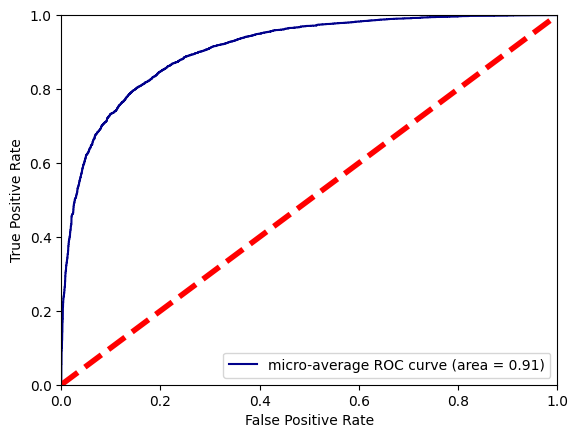

Epoch   1: Train Loss = 0.38117
Epoch   1: Train precision = 0.83312
Epoch   1: Train recall = 0.83575
Epoch   1: Train f1 score = 0.83068
Epoch   1: Train accuracy = 0.83173
Epoch   1: Valid Loss = 0.37611
Epoch   1: Valid precision = 0.81326
Epoch   1: Valid recall = 0.84471
Epoch   1: Valid f1_score = 0.82655
Epoch   1: Acurracy = 0.82981
The current loss: tensor(0.3761)
Epoch   2: Train Loss = 0.36961
Epoch   2: Train precision = 0.83361
Epoch   2: Train recall = 0.84937
Epoch   2: Train f1 score = 0.83833
Epoch   2: Train accuracy = 0.83791
Epoch   2: Valid Loss = 0.37681
Epoch   2: Valid precision = 0.79901
Epoch   2: Valid recall = 0.86911
Epoch   2: Valid f1_score = 0.83007
Epoch   2: Acurracy = 0.82866
The current loss: tensor(0.3768)
trigger times: 1
Epoch   3: Train Loss = 0.36088
Epoch   3: Train precision = 0.83742
Epoch   3: Train recall = 0.85148
Epoch   3: Train f1 score = 0.84172
Epoch   3: Train accuracy = 0.84161
Epoch   3: Valid Loss = 0.37140
Epoch   3: Valid preci

Text(0.5, 1.0, 'loss-score')

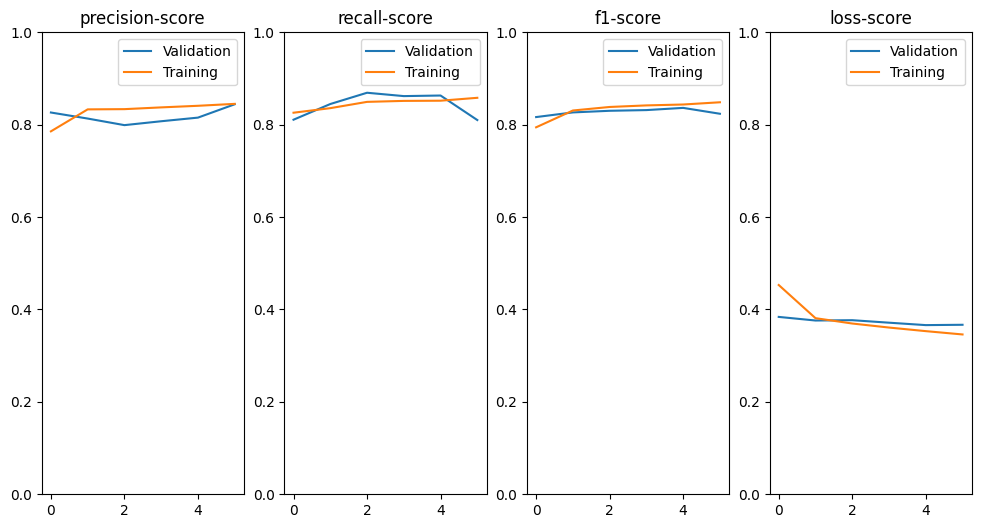

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report,roc_curve,auc,accuracy_score
from sklearn.preprocessing import label_binarize

epochs = 20

list_loss_train = []
list_epochs = []
list_loss = []
list_f1_scores_train = []
list_f1_scores = []
list_recalls_train = []
list_recalls = []
list_precisions_train = []
list_precisions = []
the_last_loss = 50
patience = 2
trigger_times = 0
for epoch in range(epochs+1):
  model.train()
  batch_losses = []
  batch_f1_scores = []
  batch_recalls = []
  batch_precisions = []
  batch_accuracy = []
  for x_batch, y_batch in train_loader:


   y_pred = model(x_batch)
   y_batch.clone().detach().requires_grad_(True)
   loss = loss_func(y_pred.squeeze(), y_batch)
   batch_losses.append(loss.item())
   preds = torch.round(y_pred).squeeze()
   #preds = y_pred.clone()
   #preds[y_pred < 0.5] = 0.0
   #preds[y_pred >= 0.5] = 1.0
   Preds = preds.tolist()
   Y_batch = y_batch.tolist()
   batch_f1_scores.append(f1_score(Y_batch, Preds))
   batch_recalls.append(recall_score(Y_batch, Preds))
   batch_precisions.append(precision_score(Y_batch, Preds))
   batch_accuracy.append(accuracy_score(Y_batch, Preds))
    #Delete previously stored gradients
   optimizer.zero_grad()

    #Perform backpropagation starting from the loss calculated in this epoch
   loss.backward()
    #Update model's weights based on the gradients calculated during backprop
   optimizer.step()
  print(f"Epoch {epoch:3}: Train Loss = {sum(batch_losses)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train precision = {sum(batch_precisions)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train recall = {sum(batch_recalls)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train f1 score = {sum(batch_f1_scores)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train accuracy = {sum(batch_accuracy)/len(train_loader):.5f}")
  list_loss_train.append(sum(batch_losses)/len(train_loader))
  list_f1_scores_train.append(sum(batch_f1_scores)/len(train_loader))
  list_precisions_train.append(sum(batch_precisions)/len(train_loader))
  list_recalls_train.append(sum(batch_recalls)/len(train_loader))
  model.eval()
  with torch.no_grad():
    Y_batches = []
    Y_preds = []
    F1 = []
    precision = []
    recall = []
    accuracy = []
    batch_losses_val = []
    for x,y in valid_loader:
      y_predict = model(x)
      y.clone().detach()
      val_loss = loss_func(y_predict.squeeze(),y)
      batch_losses_val.append(val_loss)
      y_pr = torch.round(y_predict).squeeze()
      #y_pr = y_predict.clone()
      #y_pr[y_predict < 0.5] = 0.0
      #y_pr[y_predict >= 0.5] = 1.0

      Y_p = y_pr.tolist()
      y_val = y.tolist()
      F1.append(f1_score(y_val, Y_p))

      precision.append(precision_score(y_val, Y_p))
      recall.append(recall_score(y_val, Y_p))
      accuracy.append(accuracy_score(y_val,Y_p))
      Y_batches.append(y)
      Y_preds.append(y_predict)

    Y_batches = torch.cat(Y_batches)
    Y_preds = torch.cat(Y_preds)
    print(f"Epoch {epoch:3}: Valid Loss = {sum(batch_losses_val)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid precision = {sum(precision)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid recall = {sum(recall)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid f1_score = {sum(F1)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Acurracy = {sum(accuracy)/len(valid_loader):.5f}")
    list_f1_scores.append(sum(F1)/len(valid_loader))
    list_loss.append(sum(batch_losses_val)/len(valid_loader))
    list_precisions.append(sum(precision)/len(valid_loader))
    list_recalls.append(sum(recall)/len(valid_loader))
    list_epochs.append(epoch)
    the_current_loss = sum(batch_losses_val)/len(valid_loader)
    print('The current loss:', the_current_loss)
    if the_current_loss > the_last_loss:
            trigger_times += 1
            print('trigger times:', trigger_times)

            if trigger_times >= patience:
                print('Early stopping!\nStart to test process.')
                break;

    the_last_loss = the_current_loss
  if epoch % 10 == 0:

       Y_label = label_binarize(Y_batches, classes=[0, 1])

       fpr, tpr, _ = roc_curve(Y_label.ravel(), Y_preds.ravel())
       roc_auc= auc(fpr, tpr)

       plt.figure()
       plt.plot(
          fpr,
          tpr,
          label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc),
          color="darkblue",
       )
       plt.plot([0, 1], [0, 1], color="red",lw=4, linestyle="--")
       plt.xlim([0.0, 1.0])
       plt.ylim([0.0, 1.0])
       plt.xlabel("False Positive Rate")
       plt.ylabel("True Positive Rate")
       plt.legend(loc="lower right")
       plt.show()

plt.subplots(1,4,figsize = (12,6))
plt.subplot(1,4,1)
plt.plot(list_epochs, list_precisions)
plt.plot(list_epochs, list_precisions_train)
plt.ylim(ymin = 0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("precision-score")

plt.subplot(1,4,2)
plt.plot(list_epochs, list_recalls)
plt.plot(list_epochs, list_recalls_train)
plt.ylim(ymin = 0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("recall-score")

plt.subplot(1,4,3)
plt.plot(list_epochs, list_f1_scores)
plt.plot(list_epochs, list_f1_scores_train)
plt.ylim(ymin = 0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("f1-score")

plt.subplot(1,4,4)
plt.plot(list_epochs, list_loss)
plt.plot(list_epochs, list_loss_train)
plt.ylim(ymin = 0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("loss-score")






<ipython-input-22-321db3195669>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['review']= test_data['review'].apply(lambda x:basic_preprocessing(x))
<ipython-input-22-321db3195669>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['review']= test_data['review'].apply(lambda x:remove_stopwords(x))
<ipython-input-22-321db3195669>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

Epoch   5: Valid Loss = 0.34170
Epoch   5: Valid precision = 0.86861
Epoch   5: Valid recall = 0.81573
Epoch   5: Valid f1_score = 0.83881
Epoch   5: Acurracy = 0.84751


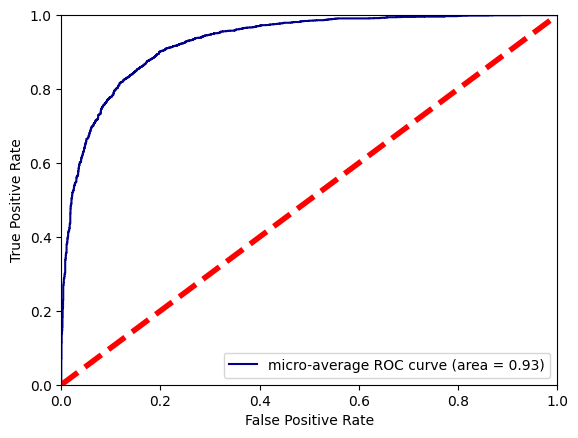

In [ ]:

#code for test dataset

test_data = data[0:5000]
if test_data is not None:
  test_data['review']= test_data['review'].apply(lambda x:basic_preprocessing(x))

  test_data['review']= test_data['review'].apply(lambda x:remove_stopwords(x))

  Y3 = test_data[['rating']]

  Y3.loc[Y3['rating'] <= 4.0, 'rating'] = 0.0
  Y3.loc[Y3['rating'] >= 7.0, 'rating'] = 1.0

  documents_test = []
  for i in range(len(test_data)):
   documents_test.append(test_data['review'][i])

  X_test = []
  Y_test = []
  for i in range(len(documents_test)):
    X3 = np.zeros(300)
    count_words = 0
    for word in range(len(documents_test[i])):
      try:
        X3 = X3 + np.array(vocabulary[documents_test[i][word]])
        count_words += 1
      except:
        continue
    if count_words != 0:
       X3 = X3/count_words
    X_test.append(X3)
    Y_test.append(Y3['rating'][i])

  X_test = torch.tensor(np.asarray(X_test), dtype=torch.float, device=device)
  Y_test = torch.tensor(np.asarray(Y_test), dtype=torch.float, device=device)
  test_dataset = TensorDataset(X_test, Y_test)
  test_loader = DataLoader(test_dataset, batch_size=64, shuffle = True)
  Y_batches = []
  Y_preds = []
  F1_score = []
  precisions = []
  recalls = []
  Accuracy = []
  Batch_losses_val = []
  model.eval()
  with torch.no_grad():
    for X,Y in test_loader:
      Y_predict = model(X)
      Y.clone().detach()
      val_loss = loss_func(Y_predict.squeeze(),Y)
      Batch_losses_val.append(val_loss)
      Y_pr = torch.round(Y_predict).squeeze()
      #y_pr = y_predict.clone()
      #y_pr[y_predict < 0.5] = 0.0
      #y_pr[y_predict >= 0.5] = 1.0

      Y_preds.append(Y_predict)
      Y_p = Y_pr.tolist()
      y_val = Y.tolist()

      F1_score.append(f1_score(y_val, Y_p))

      precisions.append(precision_score(y_val, Y_p))
      recalls.append(recall_score(y_val, Y_p))
      Accuracy.append(accuracy_score(y_val,Y_p))
      Y_batches.append(Y)

    Y_batches = torch.cat(Y_batches)
    Y_preds = torch.cat(Y_preds)

    print(f"Epoch {epoch:3}: Valid Loss = {sum(Batch_losses_val)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid precision = {sum(precisions)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid recall = {sum(recalls)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid f1_score = {sum(F1_score)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Acurracy = {sum(Accuracy)/len(test_loader):.5f}")

  Y_label = label_binarize(Y_batches, classes=[0, 1])

  fpr, tpr, _ = roc_curve(Y_label.ravel(), Y_preds.ravel())
  roc_auc= auc(fpr, tpr)

  plt.figure()
  plt.plot(
     fpr,
     tpr,
     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc),
     color="darkblue",
     )

  plt.plot([0, 1], [0, 1], color="red",lw=4, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend(loc="lower right")
  plt.show()